### 1. Utilize the diabetes dataset

Here is the difinition of each attribute
- age: age in years
- sex
- bmi: body mass index
- bp: average blood pressure
- s1: tc, total serum cholesterol
- s2: ldl, low-density lipoproteins
- s3: hdl, high-density lipoproteins
- s4: tch, total cholesterol / HDL
- s5: ltg, possibly log of serum triglycerides level
- s6: glu, blood sugar level

In [1]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("ggplot")
pd.set_option("display.max_columns", 200)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target
print(df.shape, "\n")
print(df.isna().sum(), "\n")
print(df.head(5), "\n")
print(df.dtypes, "\n")
print(df.count(), "\n")
print(df.describe())

(442, 10) 

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64 

        age       sex       bmi        bp        s1        s2        s3   
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401  \
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641   

age    float64
sex    float64
bmi    float64
bp     float64
s1     float64
s2     float64
s3     float64
s4     float64
s5     float64
s6     float64
dtype: object 

age    442
sex    442
bmi    442
bp     442
s1     442
s2   

### Frequency plot of BMI

In [11]:
df['bmi']


0      0.061696
1     -0.051474
2      0.044451
3     -0.011595
4     -0.036385
5     -0.040696
6     -0.047163
7     -0.001895
8      0.061696
9      0.039062
10    -0.083808
11     0.017506
12    -0.028840
13    -0.001895
14    -0.025607
15    -0.018062
16     0.042296
17     0.012117
18    -0.010517
19    -0.018062
20    -0.056863
21    -0.022373
22    -0.004050
23     0.060618
24     0.035829
25    -0.012673
26    -0.077342
27     0.059541
28    -0.021295
29    -0.006206
30     0.044451
31    -0.065486
32     0.125287
33    -0.050396
34    -0.063330
35    -0.030996
36     0.022895
37     0.011039
38     0.071397
39     0.014272
40    -0.008362
41    -0.067641
42    -0.010517
43    -0.023451
44     0.068163
45    -0.035307
46    -0.011595
47    -0.073030
48    -0.041774
49     0.014272
50    -0.007284
51     0.016428
52    -0.009439
53    -0.015906
54     0.025051
55    -0.049318
56     0.041218
57    -0.063330
58    -0.064408
59    -0.025607
60    -0.004050
61     0.004572
62    -0

Text(0.5, 0, 'bmi')

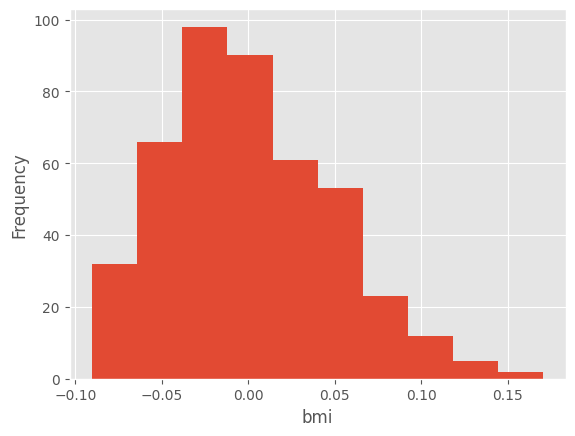

In [2]:
ax = df['bmi'].plot(kind="hist")
ax.set_xlabel('bmi')

> As histogram shows, bmi from -0.04 to 0.1 which interval contains around 190 pieces of data, it accounts for about 40 percent of whole datasets.

### Pairplot

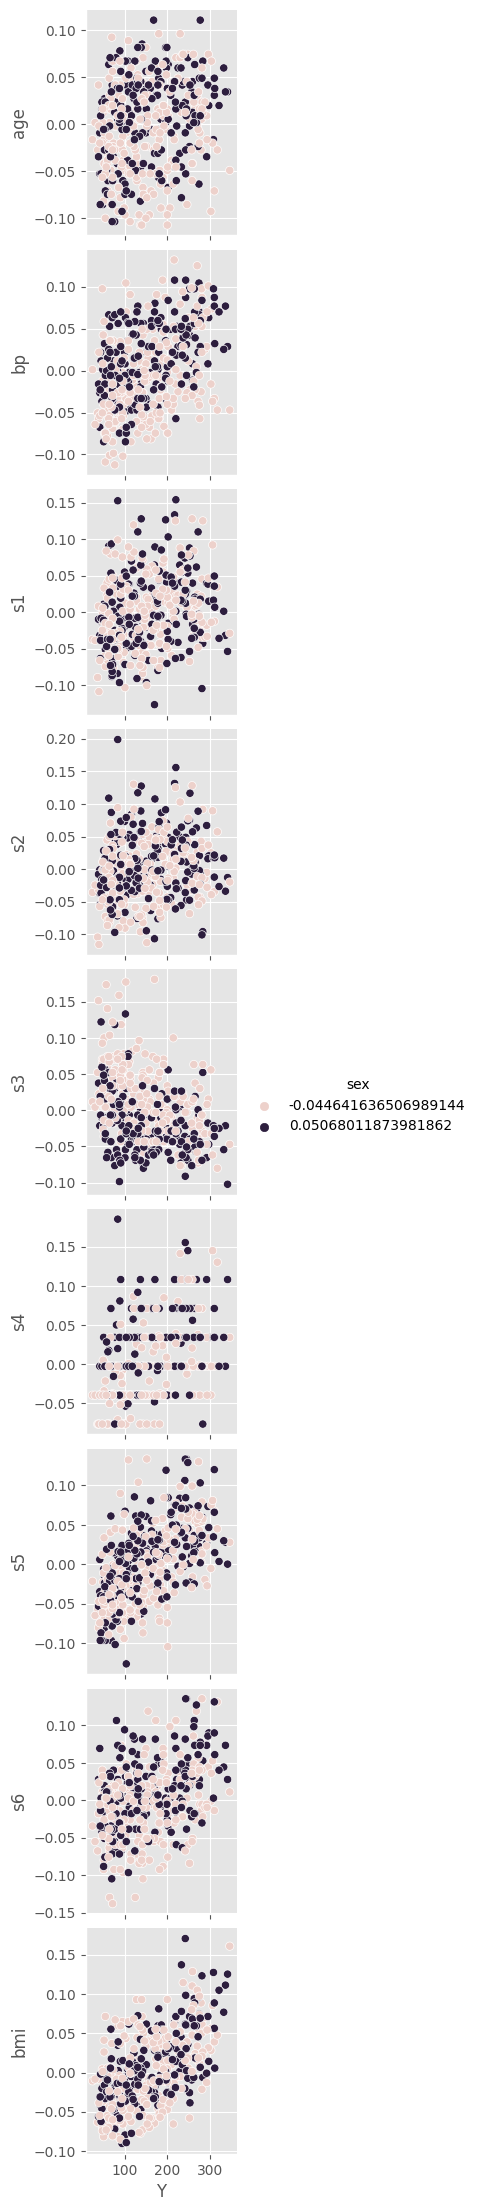

In [3]:
df_add_target = df.copy()
df_add_target['Y'] = diabetes.target
sns.pairplot(
    data=df_add_target,
    x_vars=["Y"],
    y_vars=["age", "bp", "s1", "s2", "s3", "s4", "s5", "s6", "bmi"],
    hue='sex'
)

> This time, I directly use the `target (Y)` into x axis instead of using the `bmi` variable. For the s4 (total cholesterol), it still display 6 parallel lines on the graphic, I do have take a look to the original source (https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt), around 10% data's total cholesterol are float type, it should be include more float type data after all for most situation, it is nearly impossible to close to a inter number  of a health metricx. So for this step, I would exclude the s4 from the target of the dependent variable, which may have no reference value <br> Furthermore, from the distribution of points, there seems like that `age` share less correlation to `target (Y)`, resulting in I would drop `age` column also.

### Heat Map

<Axes: >

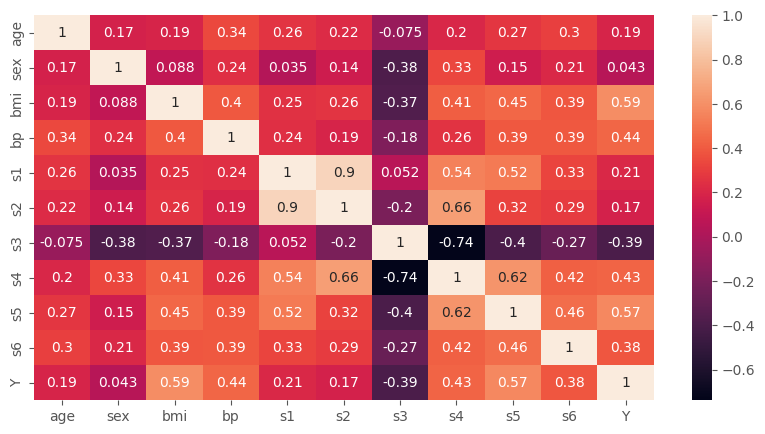

In [4]:
pearson = df_add_target.corr(method="pearson")
plt.figure(figsize=(10, 5))
sns.heatmap(pearson, annot=True)

> When focusing on the column of `Y`, it is observed that values of these attributes closer to zero have a weaker correlation with the target variable (`Y`). <br>Then, as I mentioned in last part, the correlation between `age` and `target (Y)` is only 0.19, which much close to 0. Based on this priciple, I would drop `S2` column too, because it hold smaller correlation (`0.17`) with `target (Y)` than with `age` column. However, there is interesting thing, the attribue of `S3` indicates negative correlation with all other attributes. It is a valuable attribue when we are modeling.

### Boxplots

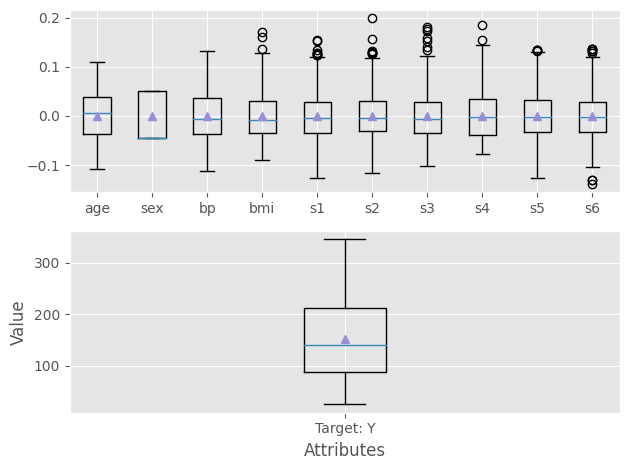

In [5]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.boxplot(df_add_target[["age", "sex", "bp", "bmi", "s1", "s2", "s3", "s4", "s5", "s6"]], showmeans=True)
ax2.boxplot(df_add_target[["Y"]], showmeans=True)
ax1.set_xticklabels(["age", "sex", "bp", "bmi", "s1", "s2", "s3", "s4", "s5", "s6"])
ax2.set_xticklabels(["Target: Y"])
plt.xlabel("Attributes")
plt.ylabel("Value")
plt.tight_layout()

plt.show()

> By observing the box plots, even though there are many outliers in the attributes: `bmi`, `s1`, `s2`, `s3`, `s4`, `s5`, `s6`, it does not have much effect on the `target (Y)`, which has no outliers. So, based on this observation, I would not take any action to deal with the outliers. Furthermore, these attributes seem to have some kind of relationship with each other; their means and medians are both located around 0 (except for `sex`).

### Drop columns: s1, s4 and age

In [6]:
df.drop(columns=['age', 's1', 's4'], inplace=True)
df.columns

Index(['sex', 'bmi', 'bp', 's2', 's3', 's5', 's6'], dtype='object')

> Since there are no missing values in the dataset, I will not make any changes. Although there are outliers in several attributes, including BMI, so I will not address the handling of outliers. Furthermore, according to the description of this dataset, the values have been standardized and scaled. This preprocessing step is known to enhance the performance of modeling.

### Split the dataset to a train (70%), test (15%), validation (15%) sets

In [7]:
from sklearn.model_selection import train_test_split

# Split the dataset for 80% and 20% by test and train sets
X_train, X_temp, y_train, y_temp = train_test_split(
    df, y, test_size=0.2, random_state=42
)
X_validation, X_test, y_validation, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

X_train.shape, X_test.shape, X_validation.shape, y_train.shape, y_test.shape, y_validation.shape

((353, 7), (45, 7), (44, 7), (353,), (45,), (44,))

### Run a polynomial regression on the BMI feature versus the " disease progression one year after baseline"

In [8]:
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

polynomial_models = [
    Pipeline(
        [("polynomial", PolynomialFeatures(degree=1)), ("linear", LinearRegression())]
    ),
    Pipeline(
        [("polynomial", PolynomialFeatures(degree=3)), ("linear", LinearRegression())]
    )
]
decision_tree_models = [
    DecisionTreeRegressor(max_depth=2),
    DecisionTreeRegressor(max_depth=4),
]
knn_models = [KNeighborsRegressor(n_neighbors=3), KNeighborsRegressor(n_neighbors=5)]

scoring_list = ["r2", "neg_mean_absolute_error", "neg_mean_absolute_percentage_error"]

df_cross_validation_results = pd.DataFrame(
    columns=[
        "model_type",
        "hyperparameter",
        "r-squared",
        "mae",
        "mape",
    ]
)

for model in polynomial_models + decision_tree_models + knn_models:
    cv_results = cross_validate(model, X_train, y_train, scoring=scoring_list, cv=5)
    
    if type(model).__name__ == "Pipeline":
        model_type = "PolynomialFeatures"
        hyperparameter = model.get_params()["steps"][0]
    else:
        model_type = type(model).__name__
        if model_type == "DecisionTreeRegressor":   
            hyperparameter = f"max_depth: {model.get_params()['max_depth']}"
        else:
            hyperparameter = f"n_neighbors: {model.get_params()['n_neighbors']}"
    
    df_cross_validation_results.loc[len(df_cross_validation_results.index)] = [
        model_type,
        hyperparameter,
        cv_results["test_r2"].mean(),
        cv_results["test_neg_mean_absolute_error"].mean(),
        cv_results["test_neg_mean_absolute_percentage_error"].mean(),
    ]
    
df_cross_validation_results

,model_type,hyperparameter,r-squared,mae,mape
0,PolynomialFeatures,"(polynomial, PolynomialFeatures(degree=1))",0.461652,-45.090521,-0.404941
1,PolynomialFeatures,"(polynomial, PolynomialFeatures(degree=3))",-0.330284,-65.924996,-0.578251
2,DecisionTreeRegressor,max_depth: 2,0.351609,-49.712153,-0.432584
3,DecisionTreeRegressor,max_depth: 4,0.248079,-52.150812,-0.444372
4,KNeighborsRegressor,n_neighbors: 3,0.253190,-51.484789,-0.437089
5,KNeighborsRegressor,n_neighbors: 5,0.339293,-49.363131,-0.429436


> Based on these results, the PolynomialFeatures with degree=1 has the highest R-squared value (0.447886) and relatively lower MAE and MAPE compared to other models. Therefore, it could be considered the best model among the options provided.

### Identify the best model

In [9]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline

polynomial_models[0].fit(X_train, y_train)
y_pred = polynomial_models[0].predict(X_test)

print("Using the best model (the PolynomialFeatures with degree=1) to run x test dataset.")
print(f"R-squared: {r2_score(y_test, y_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

Using the best model (the PolynomialFeatures with degree=1) to run x test dataset.
R-squared: 0.47580197732036633
MAPE: 0.36493994986770095
MAE: 43.91735566599512


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


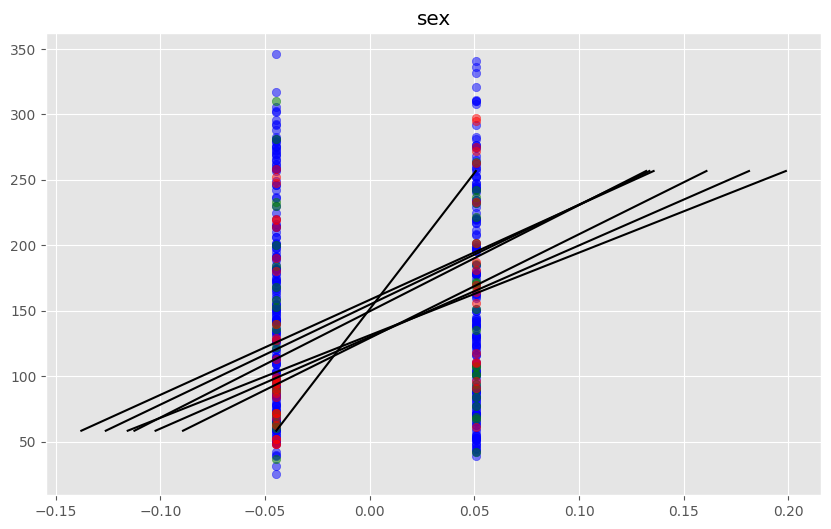

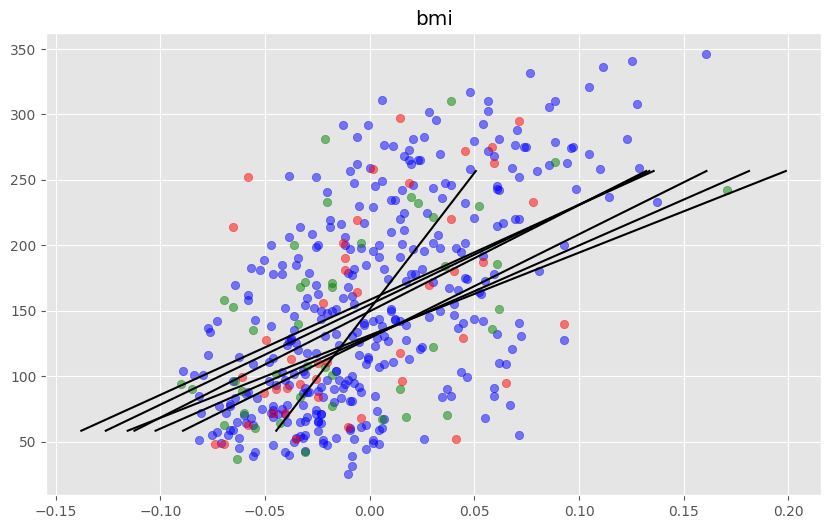

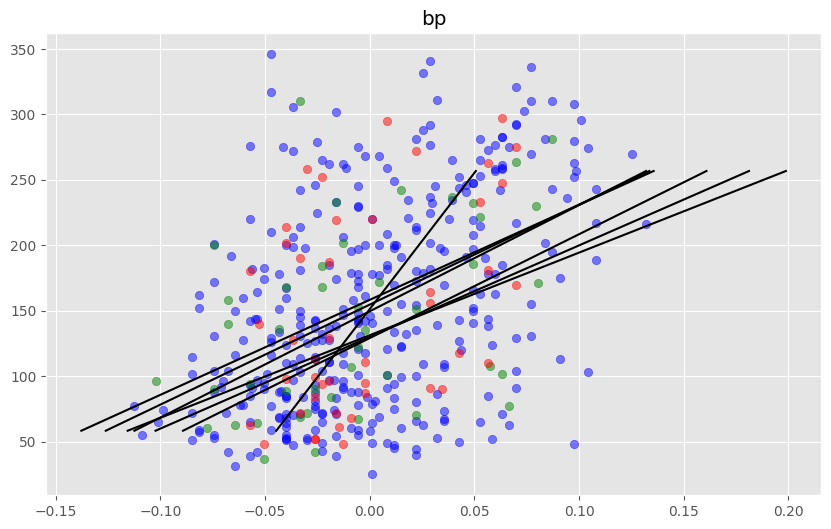

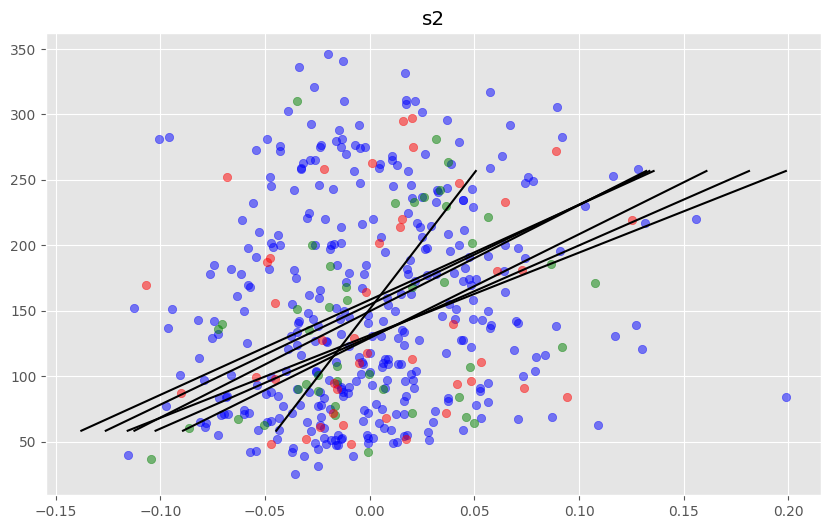

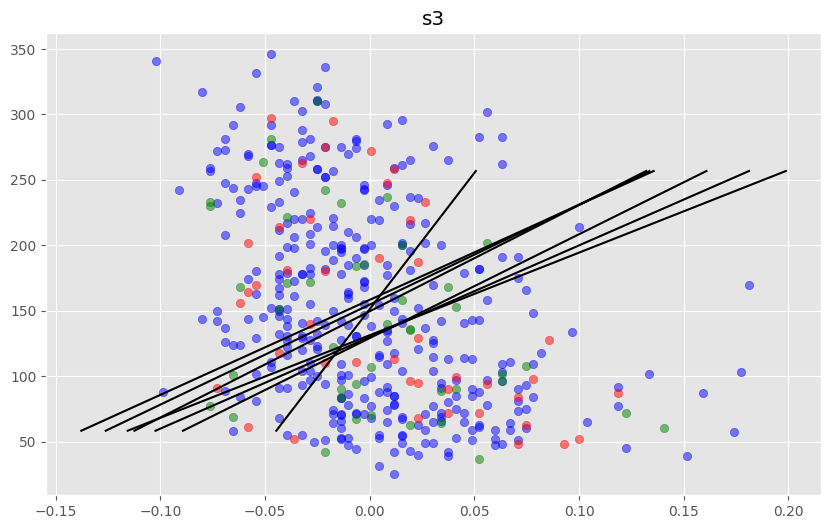

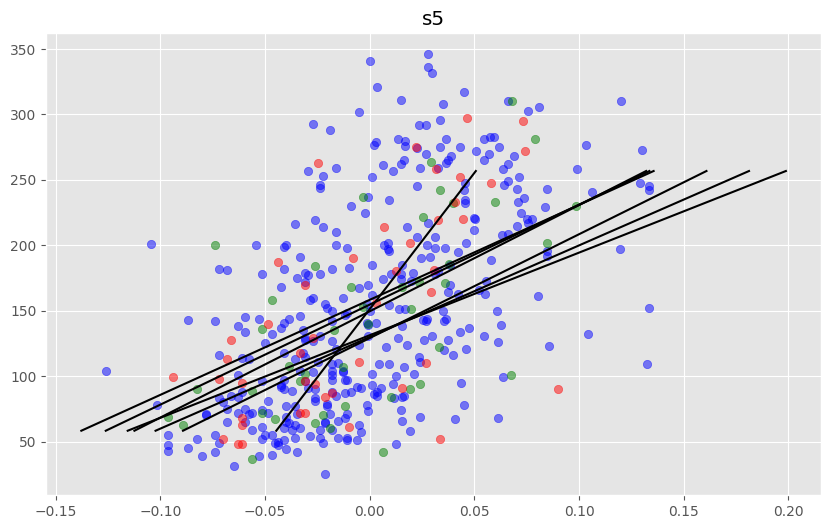

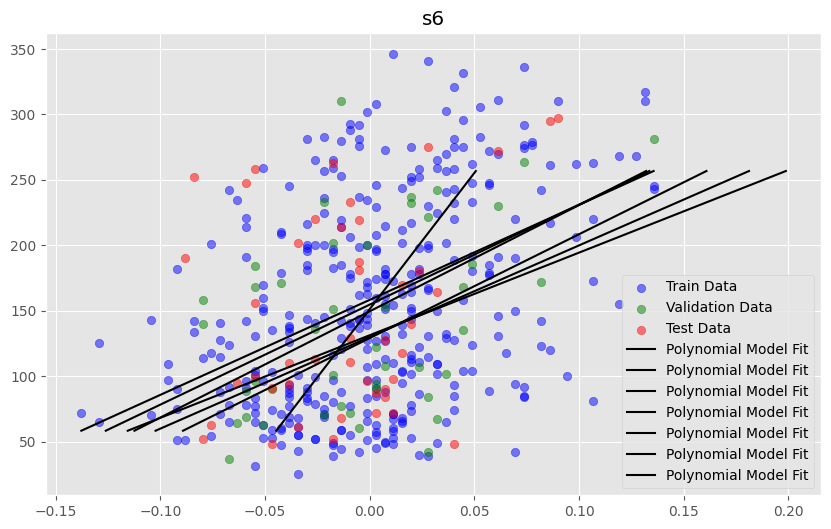

In [10]:
import numpy as np

attributes = []
for col in df.columns:
    attribute_values = np.linspace(X_train[col].min(), X_train[col].max(), 100).reshape(
        -1, 1
    )
    attributes.append(attribute_values)

x_plot = np.concatenate(attributes, axis=1)
y_plot = (
    make_pipeline(PolynomialFeatures(1), LinearRegression())
    .fit(X_train, y_train)
    .predict(x_plot)
)

for col in X_test.columns:

    plt.figure(figsize=(10, 6))
    plt.scatter(X_train[col], y_train, color="blue", alpha=0.5, label="Train Data")
    plt.scatter(
        X_validation[col],
        y_validation,
        color="green",
        alpha=0.5,
        label="Validation Data",
    )
    plt.scatter(X_test[col], y_test, color="red", alpha=0.5, label="Test Data")
    plt.plot(x_plot, y_plot, color="black", label="Polynomial Model Fit")
    plt.title(col)

plt.legend()
plt.show()

### Provide a conclusion section. In particular, do a deep dive on where the model fails, and add a short section in the conclusions that describes the model limitations. This should be in addition to summarizing it performance.

> In conclusion, when using these three models, how to decide the value of the hyperparameter is a critical part, which is more important than the choice of suitable models, because once we determine the value of the hyperparameter in a proper way, then it could perform a relative better result. Moreover, these three models have the same issue, which is that if the hyperparameter is too high, we get the overfitting performance of the model; otherwise, we get the inaccurate performance of the model. Furthermore, the value of the hyperparameter would also have a positive effect on the computational cost, especially with large datasets and deep hyperparameters. As we know, cost is an important part of the model; if we take too long or use too many computing resources, then it is not a good idea for budget control. However, understanding the limitations of each model is crucial for selecting the appropriate algorithm for a given task and ensuring robust performance in the real world, so make sure the decision is made before we actually start modeling.